<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:#CFE8FF;      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">

  <!-- logo sin cambios -->
  <img src="data/imgs/logo.png" align="right" width="200" alt="Logo">

  <!-- Datathon sin cambios -->
  <font color="#1874CD"><h1 align="left" style="margin-top:0;"><b>Datathon PDS06</b></h1></font>

  <!-- Resto en azul oscuro -->
  <h2 align="left" style="color:#003366;margin:0;"><b>Christian Esteve Orts</b></h2>
  <h3 align="left" style="color:#003366;margin:0;">Notebook: regresión lineal</h3>
</div>

<hr>


El ejercicio consta de un problema de regresión, siendo la última columna el target y el resto las potenciales variables predictoras.


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Librerías</b></h2>
</div>

In [108]:
# Gestión de la estrucutra de los datos
import pandas as pd
import numpy as np

# Gestión de ruta al dataset, por si se necesita cambiar en un futuro a una base de datos o servicio en la nube
from pathlib import Path

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
# Para test normalidad y distribución normal
from scipy import stats  # Para test de normalidad saphiro-wilk

# Para dividir el dataset en train y test
from sklearn.model_selection import train_test_split



<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Importación del dataset y comprobación rápida</b></h2>
</div>


In [109]:

DATA_PATH = Path("data/train.xlsx")  # cámbialo aquí si hace falta
df = pd.read_excel(DATA_PATH)
print(f"Número de observaciones y columnas: {df.shape}")
df.head(10)

Número de observaciones y columnas: (772, 11)


x1      x2        x3      x4     x5       x6      x7    x8  \
0   27585.8881    0.00  2.215558  176.46   4.49  1058.60  780.09  28.0   
1   45693.3376   98.06  1.406881     NaN   6.65  1066.00  785.52   NaN   
2  110889.0000    0.00  0.000000  192.00    NaN   931.20  842.60   7.0   
3  241081.0000   26.00  2.093422  210.00   3.93   882.00  699.00  28.0   
4   34670.4400  124.10  0.000000  185.70   0.00  1083.40     NaN  28.0   
5          NaN     NaN       NaN  221.40  10.50   819.20  778.40  28.0   
6   62500.0000    0.00  1.985382  187.42    NaN   956.86  861.17   3.0   
7  133956.0000  187.00  0.000000  191.30   6.60   824.30  756.90   NaN   
8   99225.0000  137.00  0.000000  145.00   5.90  1130.00     NaN  28.0   
9   98156.8900  262.20  0.000000  175.50   8.60  1046.90  611.80   3.0   

         x9       x10    deseada  
0 -1.867265  0.900023  21.539230  
1  0.633919  0.862797  17.836744  
2 -0.203045  0.461557  23.404952  
3 -1.382800  0.338268  55.551081  
4 -0.510016  0.603488  17.596806  
5 -1.280304  0.634104  31.420111  
6  0.404982  0.404319  13.817099  
7       NaN  0.071008  65.909079  
8 -0.599393  0.239180  81.751169  
9  1.538037       NaN  28.799413

Comprobación rápida de datos faltantes


In [110]:
# NAs
df.isna().sum().sum()

np.int64(774)

Se puede observar de forma rápida que el dataset tiene datos faltantes


In [111]:
# Obtenemos algunos estadísticos para ver la estructura de los datos para situar los datos faltantes
print(f"Recordar el número de observaciones: {df.shape[0]}")

# T es para transponer la matriz y mejorar la legibilidad
display(df.describe().T)

Recordar el número de observaciones: 772


count          mean           std           min           25%  \
x1       706.0  92761.097733  68338.519818  10404.000000  37900.302400   
x2       685.0     72.037898     86.135309      0.000000      0.000000   
x3       703.0      0.882659      1.026148      0.000000      0.000000   
x4       690.0    181.944594     21.474526    121.750000    164.925000   
x5       698.0      6.168636      6.033556      0.000000      0.000000   
x6       704.0    971.787997     79.482087    801.000000    932.000000   
x7       699.0    772.917167     81.459988    594.000000    725.950000   
x8       687.0     45.914119     62.163402      1.000000     14.000000   
x9       694.0      0.018116      0.979987     -3.241267     -0.651777   
x10      680.0      0.496178      0.287545      0.005230      0.248967   
deseada  772.0     35.895710     16.786940      2.331808     23.742796   

                  50%            75%            max  
x1       76729.000000  131478.760000  291600.000000  
x2          20.000000     141.300000     359.400000  
x3           0.000000       2.073865       2.292256  
x4         185.700000     192.000000     247.000000  
x5           6.000000      10.100000      32.200000  
x6         967.040000    1034.250000    1145.000000  
x7         779.700000     824.000000     992.600000  
x8          28.000000      56.000000     365.000000  
x9           0.046709       0.654966       2.720169  
x10          0.497494       0.731890       0.998348  
deseada     34.222141      45.865322      82.599225

Comparando la columna [mean] con el 50% las variables x4,x6, x7 y x10 parecen tener las mejores distribuciones. También la deseada.


Si comparamos el total de registros [count] de la columna target "deseada" con las variables predictoras, se puede comprobar que hay datos faltantes en todas las variables.


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Análisis exploratorio de los datos</b></h2>
</div>


### Gráfico de distribución para cada variable numérica


Text(0.5, 0.98, 'Distribución de variables numéricas')

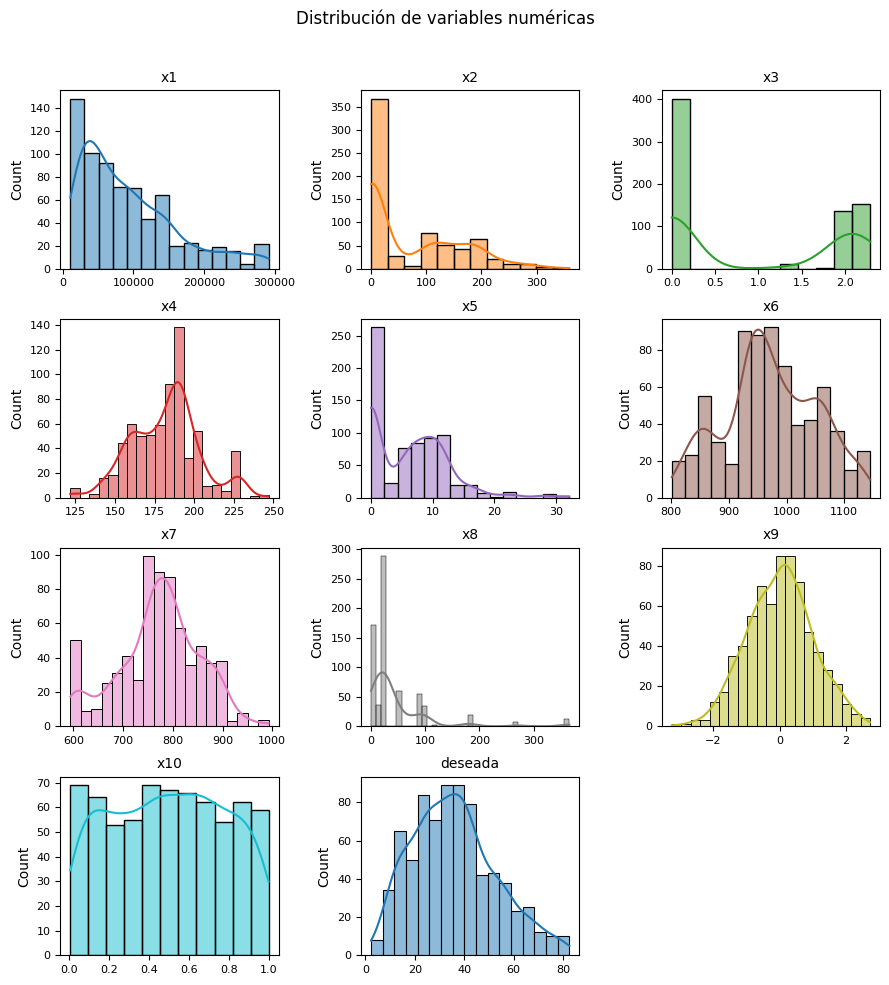

In [112]:
# Repasar los comentarios del código y cambiarlos a mejoras expositivas

import math  # Para calcular el número de filas necesarias


# --- Selección de variables y dimensionado del lienzo ---

columnas_numeric = df.select_dtypes(include=np.number).columns
n_vars = len(columnas_numeric)
if n_vars == 0:
    raise ValueError("El DataFrame no contiene columnas numéricas.")

# Máximo de columnas de subplots por fila (ajustable cambiando esta variable)
ncols = 3
# Filas necesarias para cubrir todas las variables
nrows = math.ceil(n_vars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=(3*ncols, 2.5*nrows))

# Convertir a array 1D para indexar sin errores, incluso si hay una sola fila/columna
axes = np.atleast_1d(axes).ravel()

# Paleta de colores (rotará si hay más variables que colores)
palette = sns.color_palette(n_colors=max(n_vars, 6))

# --- Bucle de trazado: un histograma por variable numérica ---
for i, col in enumerate(columnas_numeric):
    ax = axes[i]
    sns.histplot(
        data=df, x=col, stat="count", kde=True,
        color=palette[i % len(palette)], ax=ax
    )
    ax.set_title(col, fontsize=10)
    ax.tick_params(labelsize=8)
    ax.set_xlabel("")

# --- Ocultar ejes no usados (si la rejilla quedó más grande de lo necesario) ---
for ax in axes[n_vars:]:
    ax.set_visible(False)

# --- Ajustes finales de maquetación ---
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de variables numéricas', fontsize=12)

Según las gráficas , las variables x4, x6, x7 y x9 tienen las mejores distribuciones. La columna a predecir [deseada] tiene una buena distribución.


### Test de Saphiro

Para


In [113]:
# Normalidad en la variable respuesta "deseada"

shapiro_test = stats.shapiro(df["deseada"])
print(
    f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]}, p-value = {shapiro_test[1]}")

Test Shapiro-Wilk: estadístico = 0.977448345500092, p-value = 1.538592711759505e-09


El test Shapiro-Wilk contrasta la hipótesis nula de distribución normal de los datos. La variable respuesta [deseada] obtenemos un p-valor superior a 0,05 (nivel de confianza de un 95%) y, por lo tanto, podemos aceptar la hipótesis nula y asumir que la distrubución es normal.


# Correlaciones


Generamos la matriz directamente, ya que la visualización es mejor.


<Axes: >

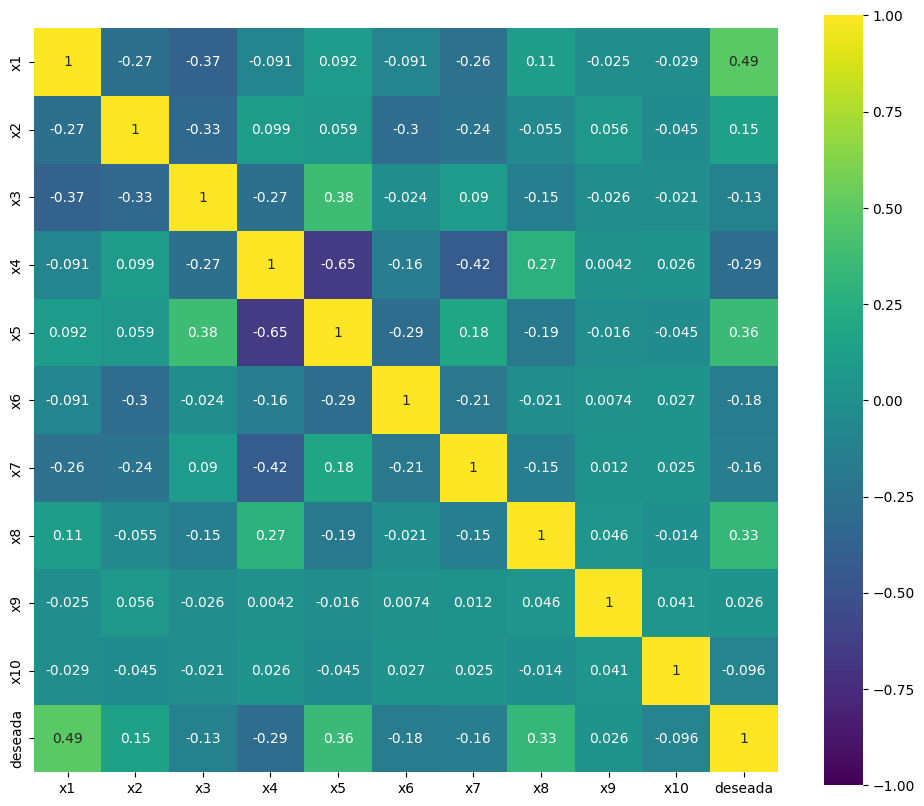

In [114]:
# Matriz de correlaciones entre variables numéricas
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),
            cmap="viridis",
            vmin=-1, vmax=1,  # Evitamos el cálculo automático de los límites
            annot=True,
            cbar=True,
            square=True)

Conclusión: x1 es el predictor lineal más potente; x5, x8 y x4 (con signo opuesto) aportan información adicional. El resto apenas correlaciona linealmente con la respuesta.

La matriz revela que x1 es el predictor lineal dominante (ρ ≈ 0.49) seguido de x5 y x8; x4 ejerce un efecto inverso (ρ ≈ -0.29).

La única colinealidad preocupante es el fuerte anticorrelación x4-x5 (-0.65). Por ello, vigilaré VIF o usaré regularización para evitar inestabilidad en un modelo lineal. En cambio, un modelo basado en árboles manejaría bien estas correlaciones moderadas.


# Distribución de cada variable enfrentada al resto


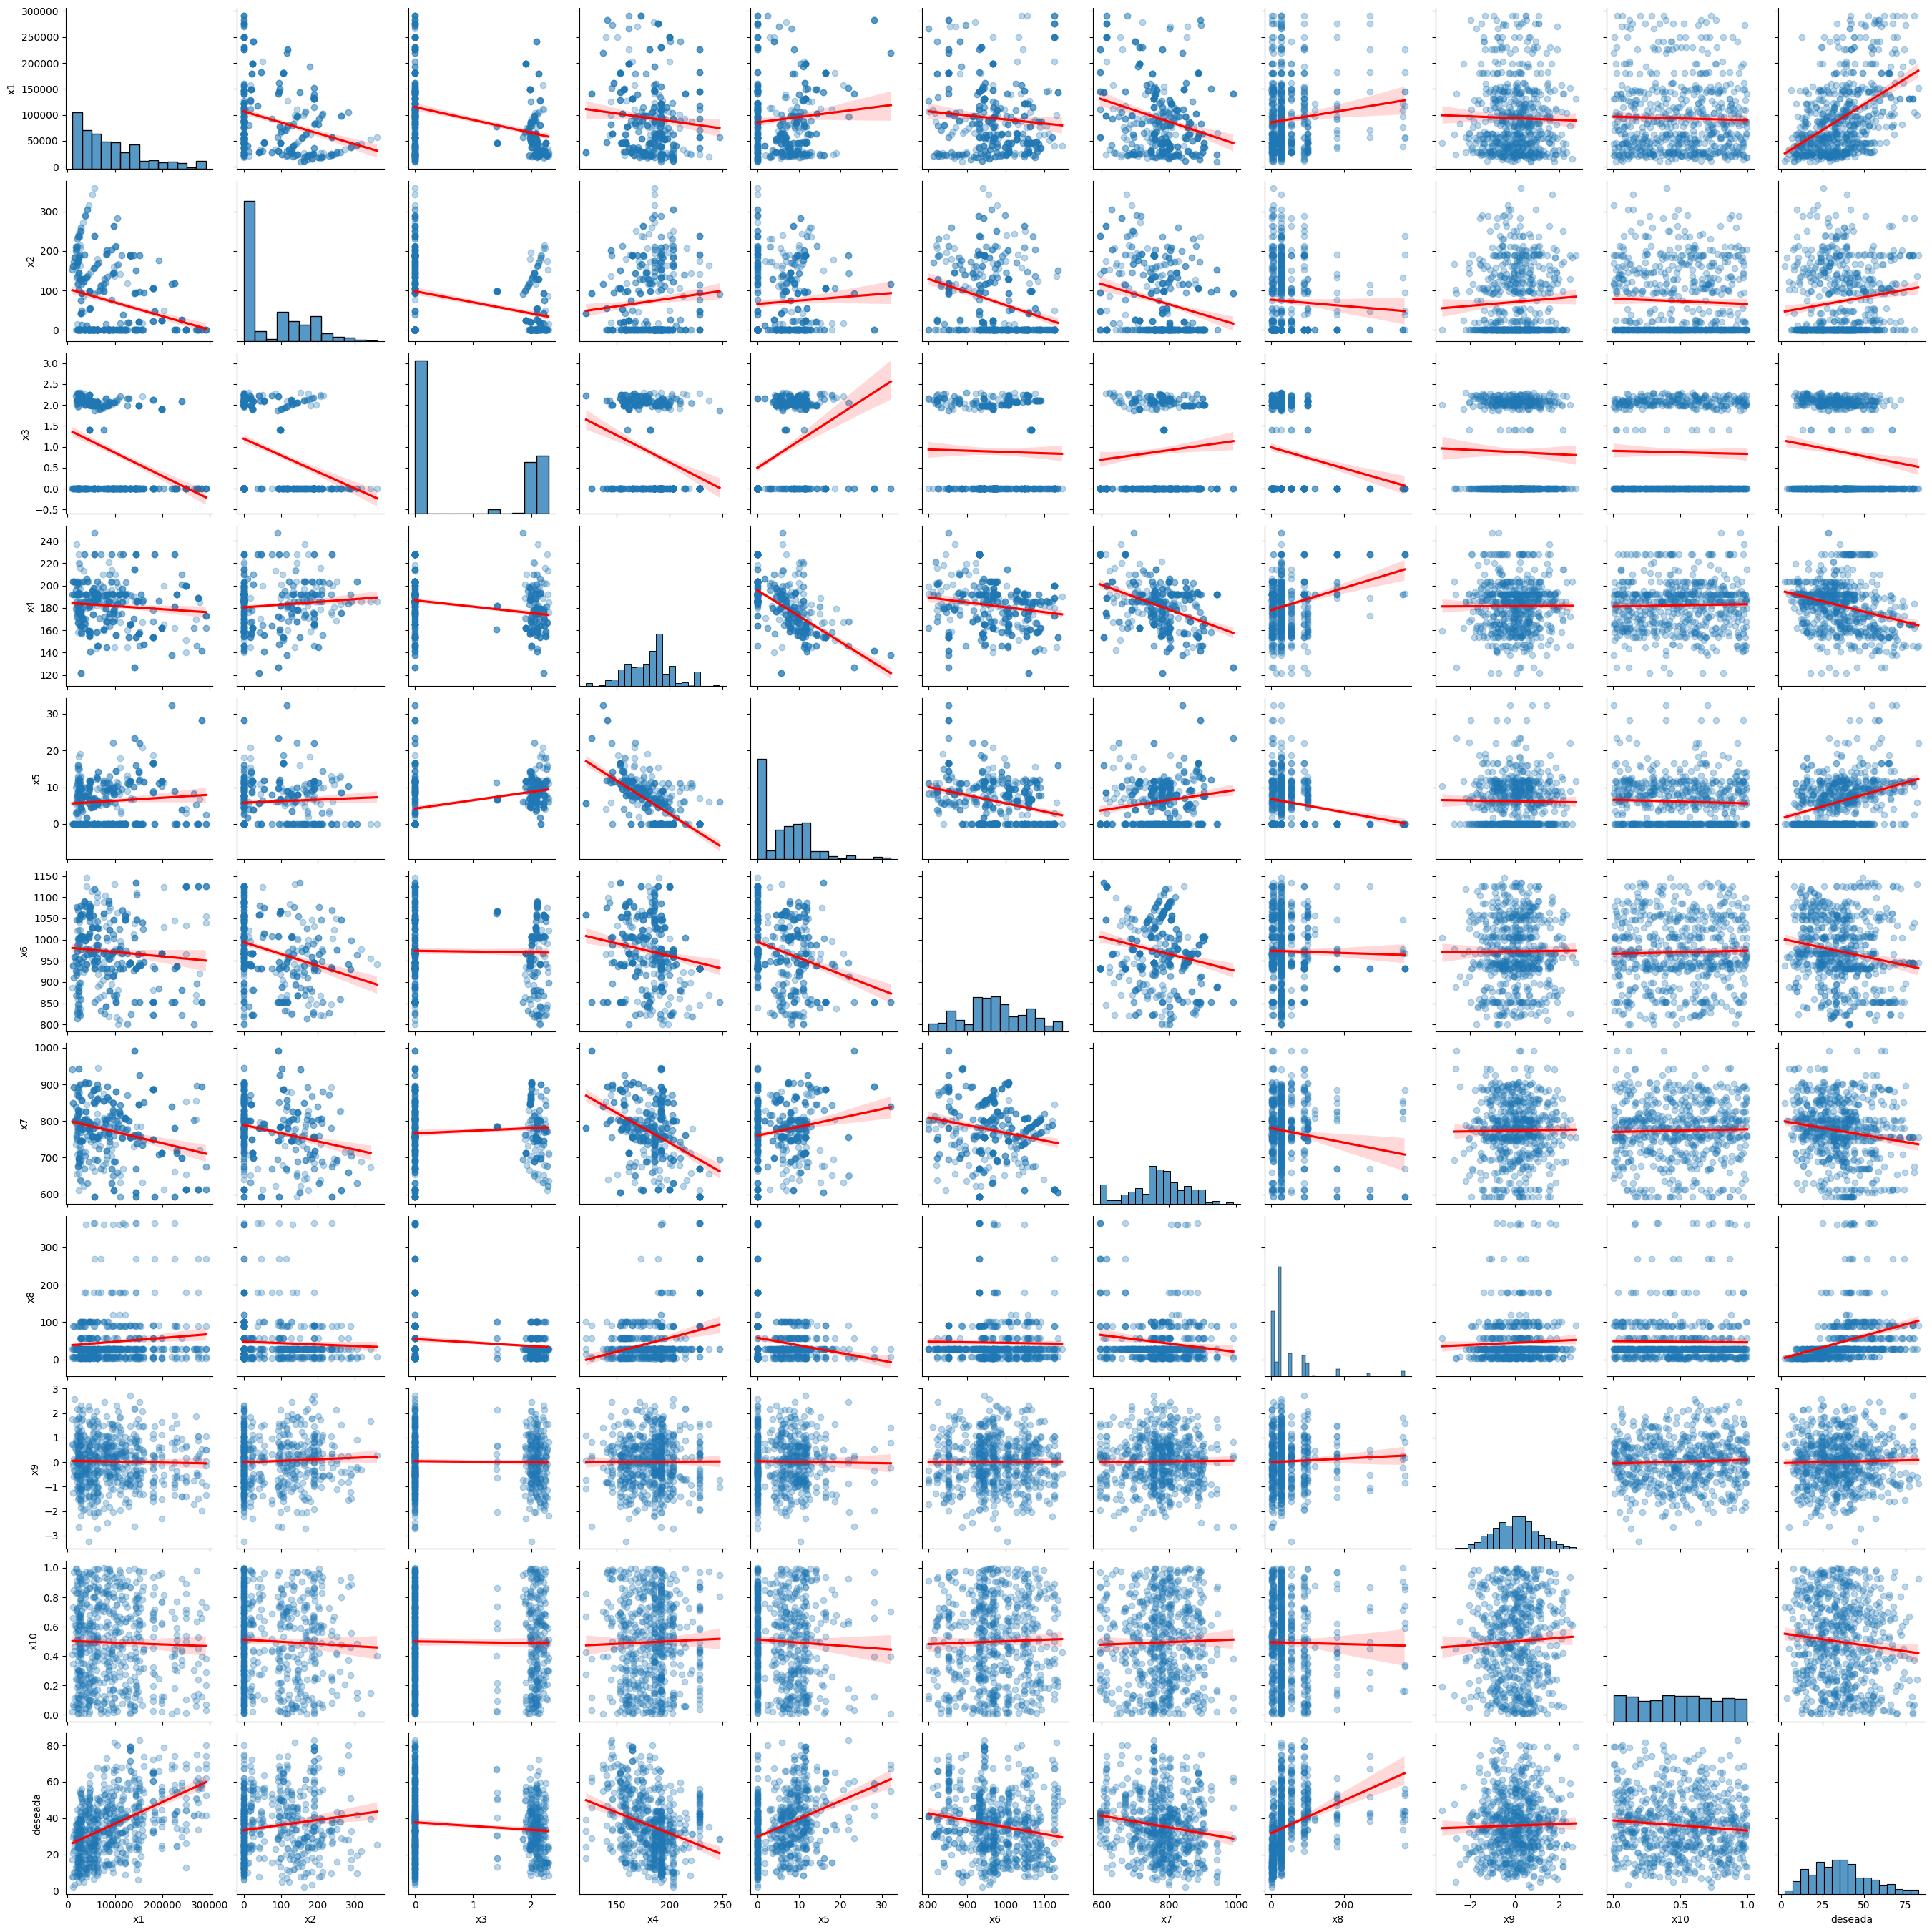

In [115]:


# Distribución de cada variable enfrentada al resto
sns.pairplot(df, kind="reg",
             plot_kws={"line_kws": {"color": "red"},
                       "scatter_kws": {"alpha": 0.3}})

plt.show()

Tendencias lineales claras con el target: x1, x5, x8 (positivas) x4 (negativa). Refuerza lo se ve en la matriz de correlación: serán los predictores más prometedores.

Relación negativa marcada entre predictores x4 ↔ x5 Evidencia visual de su colinealidad moderada (r ≈ −0,65). Conviene monitorizar VIF o usar regularización.

Escalas muy dispares, por ejemplo x1 y x9. Será necesario la normalización de las variables predictoras.

Las distribucuines de cola pesada de x1 (potancialmente el predictor principal), x2 y x5 son susceptibles de necesitar transformación por BosCox o Yeo-Johnson.

x9 y, en menor medida, x10 (todas las dispersión–[deseada] son nubes sin patrón)

x3 es pobre en colinealidad y presenta una gran cantidad de valores en 0, por lo que es candidata a excluirse.



### Conclusiones para transformaciones de las variables

x1
Vacíos: 8,55 %. Imputación: mediana. No tocar ceros (no hay).

Transformación: Box-Cox (todos > 0, asimetría derecha moderada ~1.10).

Descartar: No (r con objetivo ≈ +0,49).

x2
Vacíos: 11,27 %. Imputación: mediana.
Ceros: 41,3 % (valor real, mantener).

Transformación: Yeo-Johnson (admite 0), asimetría ~0,84.
(Opcional y recomendable: añadir x2_bin=(x2>0) para capturar “presencia/ausencia”).*

Descartar: No por ahora (r ≈ +0,15).

x3
Vacíos: 8,94 %. Imputación: mediana.
Ceros: 52,1 % (exceso de ceros, mantener como valor real).

Transformación: Yeo-Johnson.
(Opcional recomendable: x3_bin=(x3>0); mejora linealidad al separar presencia/magnitud).

Descartar: No (aunque r es baja ≈ −0,13, puede aportar combinado).

x4
Vacíos: 10,62 %. Imputación: mediana. Ceros: 0.

Transformación: Ninguna (distribución casi simétrica, rango acotado).

Descartar: No (r ≈ −0,29).

x5
Vacíos: 9,59 %. Imputación: mediana.
Ceros: 33,4 % (mantener).

Transformación: Yeo-Johnson (asimetría ~0,96).
(Opcional recomendable: x5_bin=(x5>0)).

Descartar: No (r ≈ +0,36).

x6
Vacíos: 8,81 %. Imputación: mediana. Ceros: 0.

Transformación: Ninguna (distribución casi simétrica).

Descartar: No (r ≈ −0,18).

x7
Vacíos: 9,46 %. Imputación: mediana. Ceros: 0.

Transformación: Ninguna (ligera asimetría izquierda).

Descartar: No (r ≈ −0,16).

x8
Vacíos: 11,01 %. Imputación: mediana. Ceros: 0. Mín=1.

Transformación: Box-Cox (asimetría fuerte ~3,26; todos > 0).

Descartar: No (r ≈ +0,33).

x9
Vacíos: 10,10 %. Imputación: mediana. Puede ser ya estandarizada (μ≈0).

Transformación: Ninguna / YJ innecesario (hay negativos, pero distribución ya casi simétrica).

Descartar: Sí, de entrada (r ≈ +0,03, señal prácticamente nula en un modelo lineal sin interacciones). Si luego usamos regularización, se puede re-evaluar.

x10
Vacíos: 11,92 %. Imputación: mediana. Ceros verdaderos: no (mín ~0,005).

Transformación: Ninguna (0–1 casi simétrica).

Descartar: No (r ≈ −0,10; débil pero puede sumar un poco).

<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>División del dataset</b></h2>
</div>


In [116]:
# División en entrenamiento y test
df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=42, shuffle=True)

# Ahora dividimos en X e y
# Dataframe entrenamiento con la variable respuesta
y_train = df_train["deseada"]
y_test = df_test["deseada"]  # Dataframe test con la variable respuesta

# Dataframe entrenamiento con las variables predictoras
X_train = df_train.drop("deseada", axis=1)
# Dataframe test con las variables predictoras
X_test = df_test.drop("deseada", axis=1)

In [117]:
# Comprobamos dimensiones
print(f"Dimensiones train: {X_train.shape}.")
print(f"Dimensiones test: {X_test.shape}.")

Dimensiones train: (617, 10).
Dimensiones test: (155, 10).


<div style="
  border:3px solid #003366;      /* azul oscuro (borde) */
  border-radius:10px;
  background-color:rgba(207,232,255,0.6);      /* azul claro (fondo) */
  padding:4px 8px;              /* menos espacio interno */
  overflow:auto;">
<h2 align="left" style="color:#003366;margin:0;"><b>Transformación de los datos</b></h2>
</div>


In [118]:
#importacion de la funcion de transformación
from Transformacion import FitTransformColumn

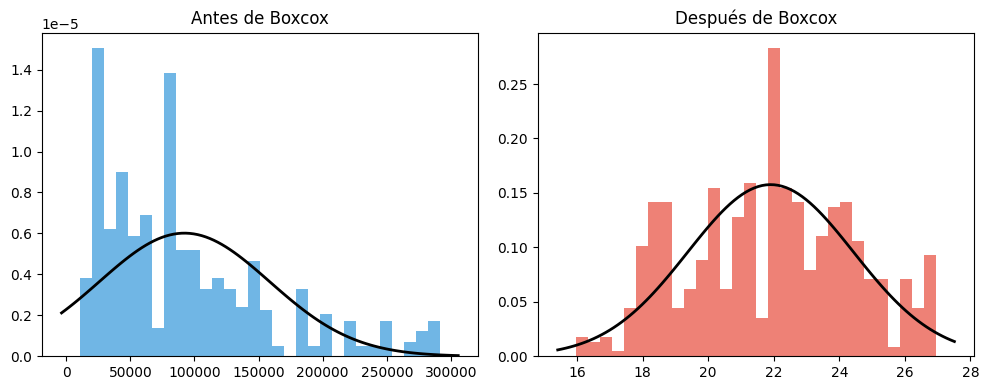

Transformación de x1: lambda = 0.1089
Primeros 5 registros de x1 transformado:
[18.20201873 24.02505176 18.8438549  21.35593634 24.61822144]


In [ ]:
# Transformación para x1
#Vacíos: 8,55 %. Imputación: mediana.

x1 = X_train['x1']
x1_median = float(x1.median())
x1_imputed = x1.fillna(x1_median)

#Transformación: Box-Cox (todos > 0).
x1_transformed, x1_lambda = FitTransformColumn(x1_imputed, method='boxcox')

print (f"Transformación de x1: lambda = {x1_lambda:.4f}")

# ver los 5 primeros registros de x1_transformed
print("Primeros 5 registros de x1 transformado:")
print(x1_transformed[:5]) 



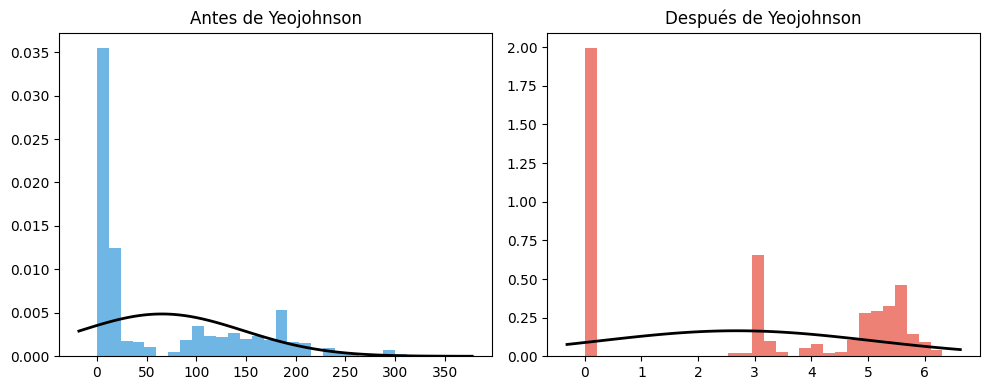

Transformación de x2: lambda = 0.0237
Primeros 5 registros de x2 transformado:
[0.         5.57465638 3.93566835 0.         0.        ]


In [ ]:
# Transformación para x2

# Vacíos: 11,27 %. Imputación: mediana.
# Ceros: 41,3 % (valor real, mantener).

x2 = X_train['x2']
x2_median = float(x2.median())
x2_imputed = x2.fillna(x2_median)

# Transformación: Yeo-Johnson (admite 0).
x2_transformed, x2_lambda = FitTransformColumn(x2_imputed, method='yeojohnson')

print (f"Transformación de x2: lambda = {x2_lambda:.4f}")

# ver los 5 primeros registros de x2_trnasformed
print("Primeros 5 registros de x2 transformado:")
print(x2_transformed[:5]) 




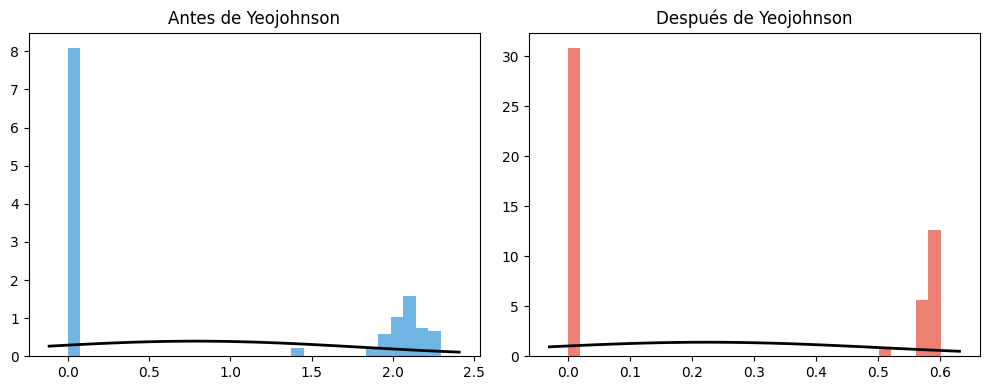

Transformación de x3: lambda = -1.3156
Primeros 5 registros de x3 transformado:
[0.59998879 0.         0.59669803 0.58088572 0.        ]


In [ ]:
#Transformación para x3

#Vacíos: 8,94 %. Imputación: mediana.

x3 = X_train['x3']
x3_median = float(x3.median())
x3_imputed = x3.fillna(x3_median)

# Ceros: 52,1 % (exceso de ceros, mantener como valor real).

#Transformación: Yeo-Johnson.

x3_transformed, x3_lambda = FitTransformColumn(x3_imputed, method='yeojohnson')

print (f"Transformación de x3: lambda = {x3_lambda:.4f}")

# ver los 5 primeros registros de x3_trnasformed
print("Primeros 5 registros de x3 transformado:")
print(x3_transformed[:5]) 

Text(0.5, 0, 'Valor')

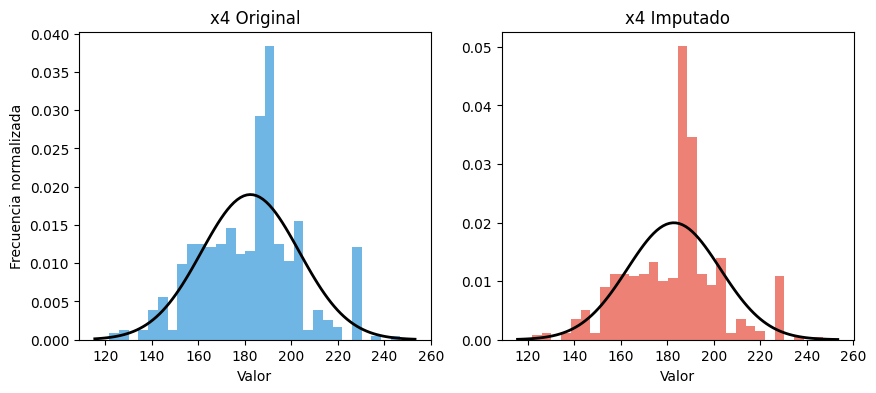

In [139]:
#transformación para x4

#Vacíos: 10,62 %. Imputación: mediana. Ceros: 0.

x4 = X_train['x4']
x4_median = float(x4.median())
x4_imputed = x4.fillna(x4_median)

#Transformación: Ninguna (distribución casi simétrica, rango acotado).

# Mostrar histogramas (antes y después de imputar)
colors = ['#3498db', '#e74c3c']
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# --- Histograma x4 original ---
axes[0].hist(x4, bins=30, color=colors[0], alpha=0.7, density=True)
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x4), np.std(x4))
axes[0].plot(x, p, 'k-', linewidth=2)
axes[0].set_title('x4 Original', fontsize=12)
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia normalizada')

# --- Histograma x4 imputado ---
axes[1].hist(x4_imputed, bins=30, color=colors[1], alpha=0.7, density=True)
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(x4_imputed), np.std(x4_imputed))
axes[1].plot(x, p, 'k-', linewidth=2)
axes[1].set_title('x4 Imputado', fontsize=12)
axes[1].set_xlabel('Valor')


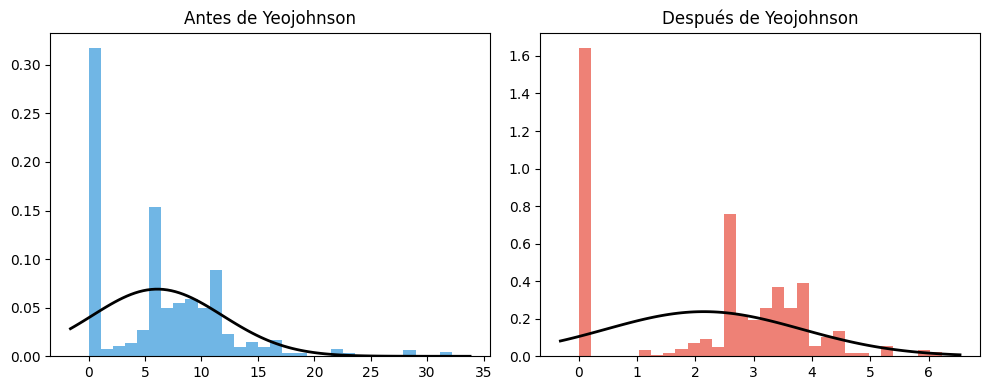

Transformación de x5: lambda = 0.3018
Primeros 5 registros de x5 transformado:
[3.87224801 2.89285782 2.57472576 4.00293211 0.        ]


In [140]:
# Vacíos: 9,59 %. Imputación: mediana.

x5 = X_train['x5']
x5_missing = int(x5.isna().sum())
x5_zeros = int((x5 == 0).sum())
x5_median = float(x5.median())

# Imputación
x5_imputed = x5.fillna(x5_median)

# Ceros: 33,4 % (mantener).

# Transformación: Yeo-Johnson (asimetría ~0,96).
x5_transformed, x5_lambda = FitTransformColumn(x5_imputed, method='yeojohnson')

print (f"Transformación de x5: lambda = {x5_lambda:.4f}")

# ver los 5 primeros registros de x5_trnasformed
print("Primeros 5 registros de x5 transformado:")
print(x5_transformed[:5]) 



In [ ]:
x6
Vacíos: 8,81 %. Imputación: mediana. Ceros: 0.

Transformación: Ninguna (distribución casi simétrica).

Descartar: No (r ≈ −0,18).

In [ ]:
x7
Vacíos: 9,46 %. Imputación: mediana. Ceros: 0.

Transformación: Ninguna (ligera asimetría izquierda).

Descartar: No (r ≈ −0,16).

In [ ]:
x8
Vacíos: 11,01 %. Imputación: mediana. Ceros: 0. Mín=1.

Transformación: Box-Cox (asimetría fuerte ~3,26; todos > 0).

Descartar: No (r ≈ +0,33).

In [ ]:
x9
Vacíos: 10,10 %. Imputación: mediana. Puede ser ya estandarizada (μ≈0).

Transformación: Ninguna / YJ innecesario (hay negativos, pero distribución ya casi simétrica).

Descartar: Sí, de entrada (r ≈ +0,03, señal prácticamente nula en un modelo lineal sin interacciones). Si luego usamos regularización, se puede re-evaluar.

In [ ]:
x10
Vacíos: 11,92 %. Imputación: mediana. Ceros verdaderos: no (mín ~0,005).

Transformación: Ninguna (0–1 casi simétrica).

Descartar: No (r ≈ −0,10; débil pero puede sumar un poco).